# Imports

In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D
from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.netpros import *
from lib.syn import *
from lib.experiments import *
from lib.static import *
from lib.datasets import *

In [2]:
sizes = range(200, 1001, 200)

num = 1
balance = 1.
sparsity = 0.8
noise = .1
energy = 100
res_t = size_time_experiment(sizes, balance, sparsity, energy, noise, num)

In [3]:
print(res_t)

[[  1.86320829e+00   6.15861416e-02   8.57412815e-02   1.63758278e-01]
 [  1.29429839e+01   2.39152670e-01   3.46330881e-01   5.92451572e-01]
 [  4.52239070e+01   6.19072437e-01   8.26165199e-01   1.47193980e+00]
 [  1.58993201e+02   9.89543438e-01   1.46844316e+00   2.46115661e+00]
 [  3.01664764e+02   1.57800031e+00   2.32675910e+00   3.92729664e+00]]


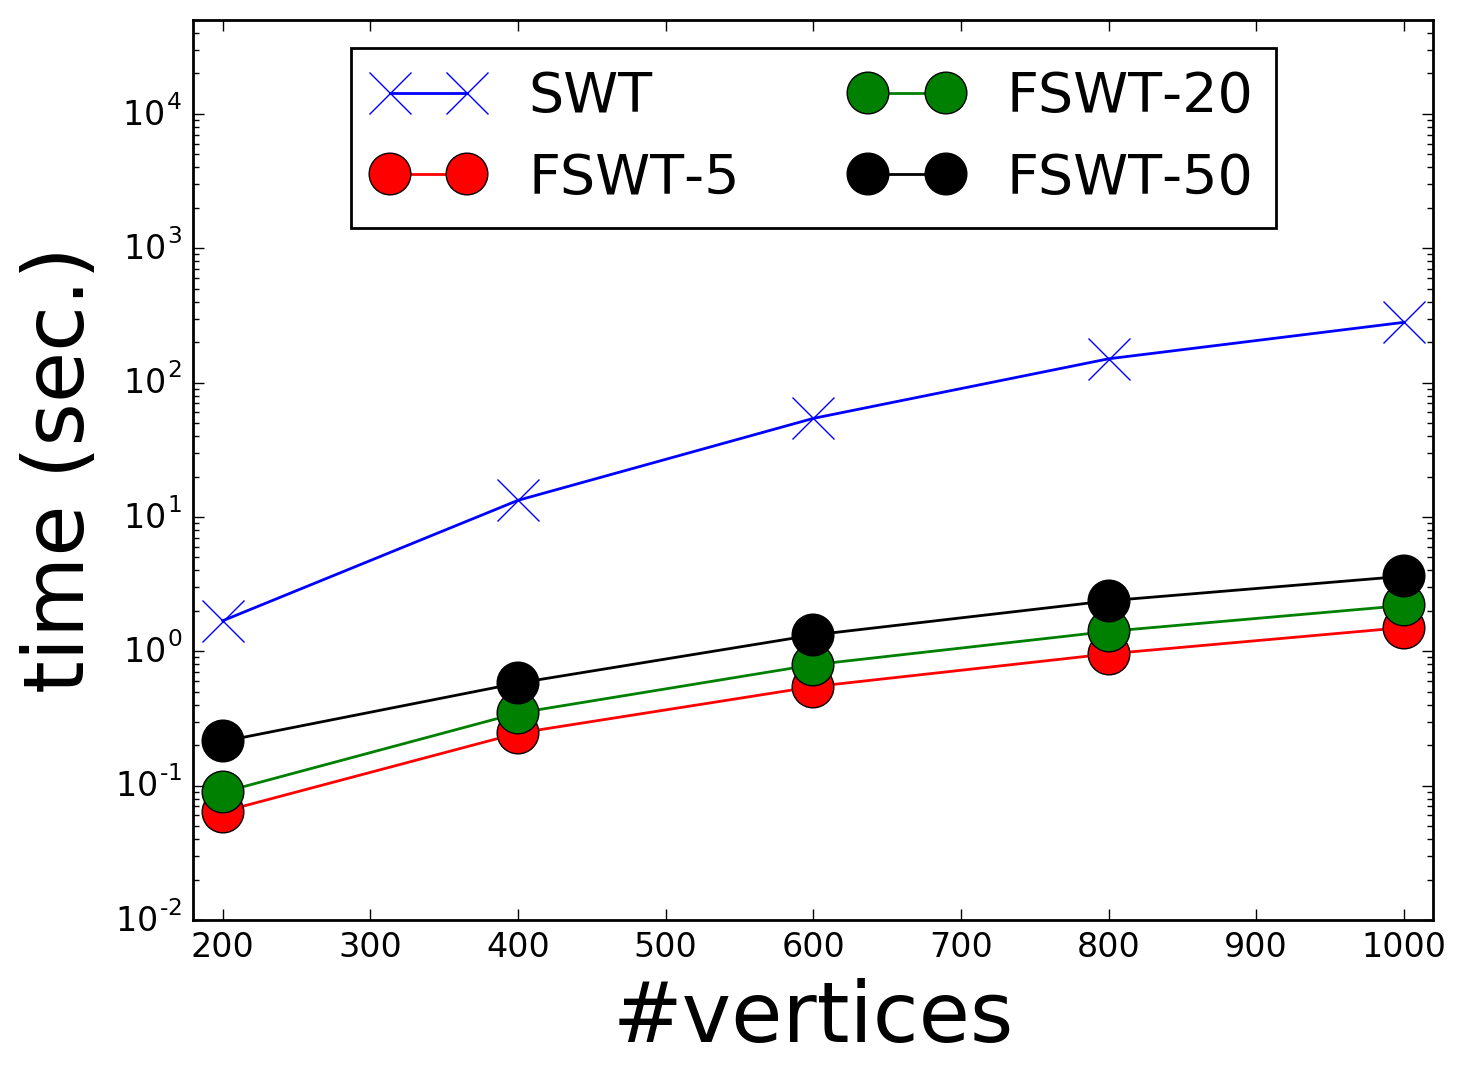

In [3]:
plot_size_time_experiment(numpy.array(res_t), sizes, "figs/size_time_synthetic.png")
Image(filename="figs/size_time_synthetic.png")

In [3]:
sparsity = [0.2, 0.4, 0.6, 0.8]
size = 500
num = 10
balance = 1.
noise = .5
energy = 100
res_acc = sparsity_acc_experiment(sparsity, size, balance, energy, noise, num)

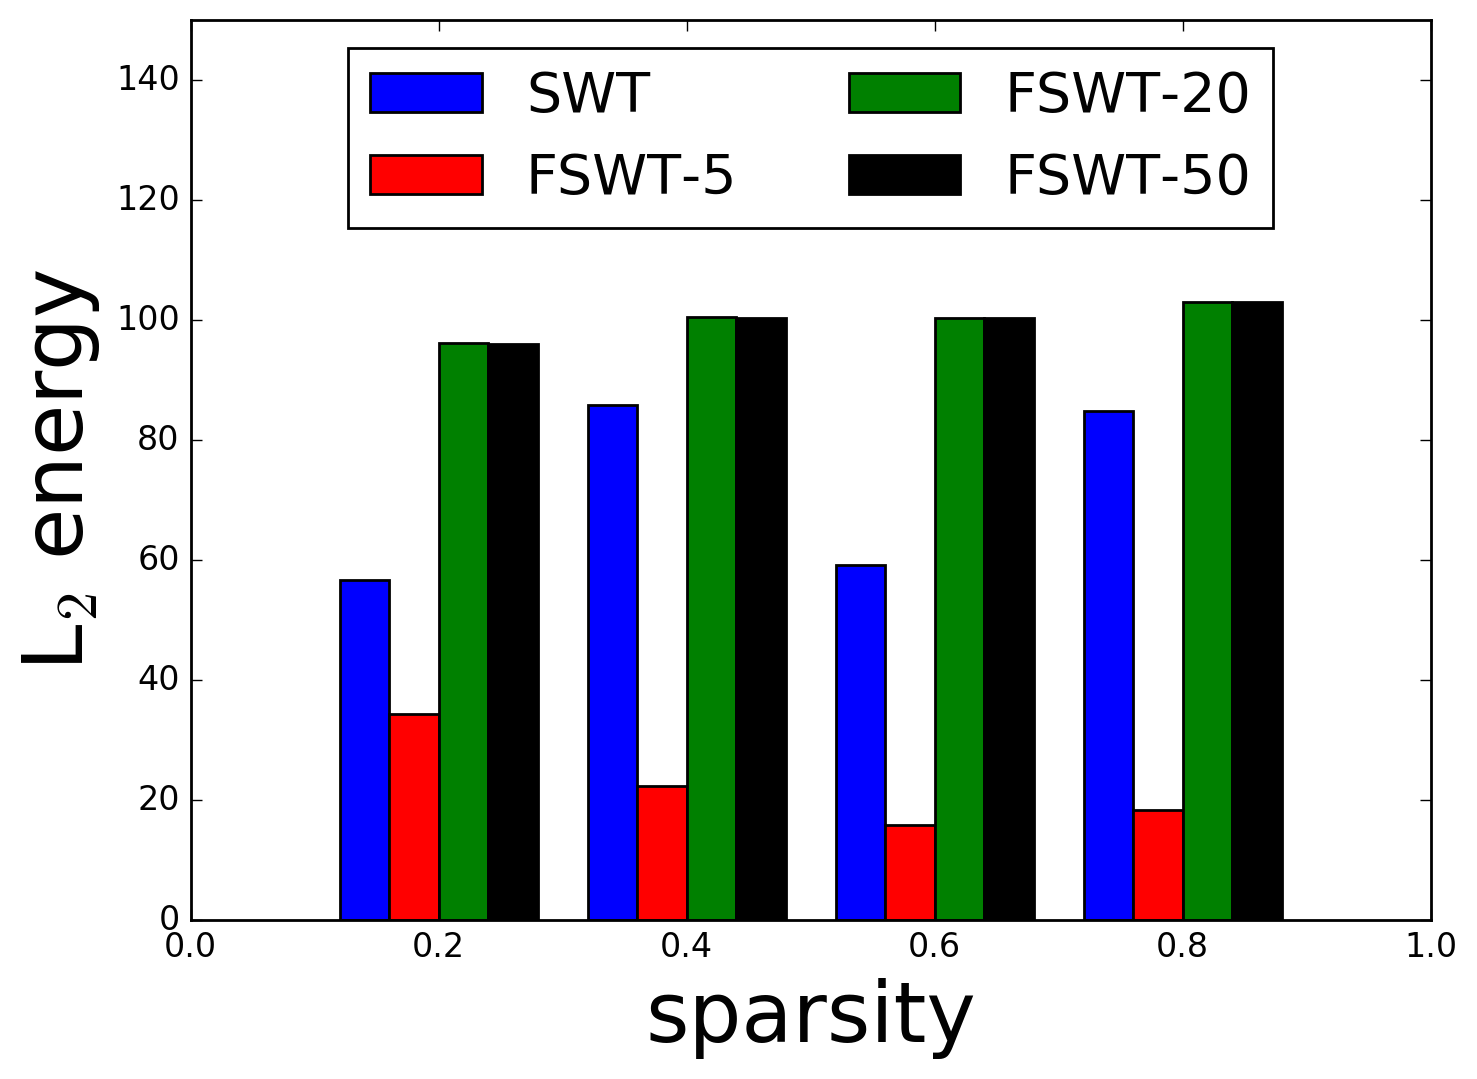

In [4]:
plot_sparsity_acc_experiment(res_acc, sparsity, "figs/sparsity_acc_synthetic.png")
Image(filename="figs/sparsity_acc_synthetic.png")

In [4]:
print(res_acc)

[[ 100.          100.        ]
 [  22.58064516  100.        ]
 [ 100.          100.        ]
 [ 100.          100.        ]]


In [2]:
energy = [10, 100, 1000, 10000, 100000]
noise = .5
size = 500
num = 10
sparsity = .5
balance = 1.
res_acc = energy_acc_experiment(energy, size, sparsity, noise, balance, num)

In [4]:
res_acc

array([[  1.00563890e+01,   1.00563890e+01,   1.00563890e+01,
          1.00563890e+01],
       [  1.03203897e+02,   1.03203897e+02,   1.03203897e+02,
          1.03203897e+02],
       [  1.01891780e+03,   1.01891780e+03,   1.01891780e+03,
          1.01891780e+03],
       [  9.88763980e+03,   9.88763980e+03,   9.88763980e+03,
          9.88763980e+03],
       [  1.00841638e+05,   1.00841638e+05,   1.00841638e+05,
          1.00841638e+05]])

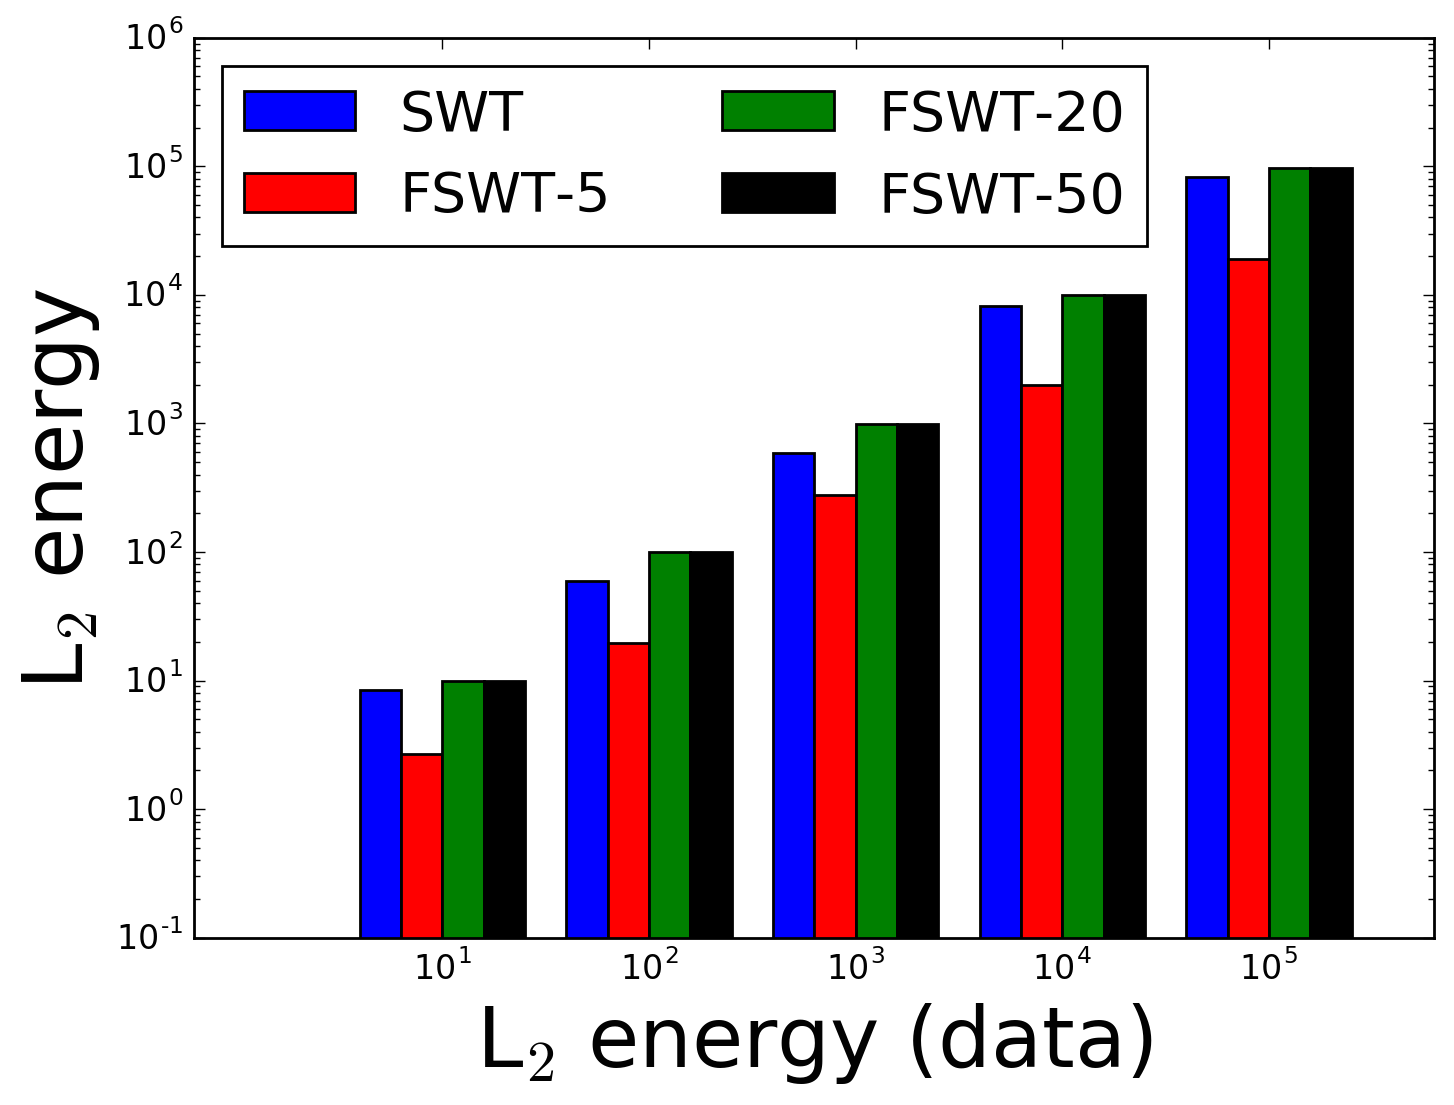

In [3]:
plot_energy_acc_experiment(res_acc, energy, "figs/energy_acc_synthetic.png")

Image(filename="figs/energy_acc_synthetic.png")

In [2]:
noise = [.2, .4, .6, .8]
size = 500
num = 10
sparsity = 1.
balance = 1.
energy = 100
res_acc = noise_acc_experiment(noise, size, sparsity, energy, balance, num)

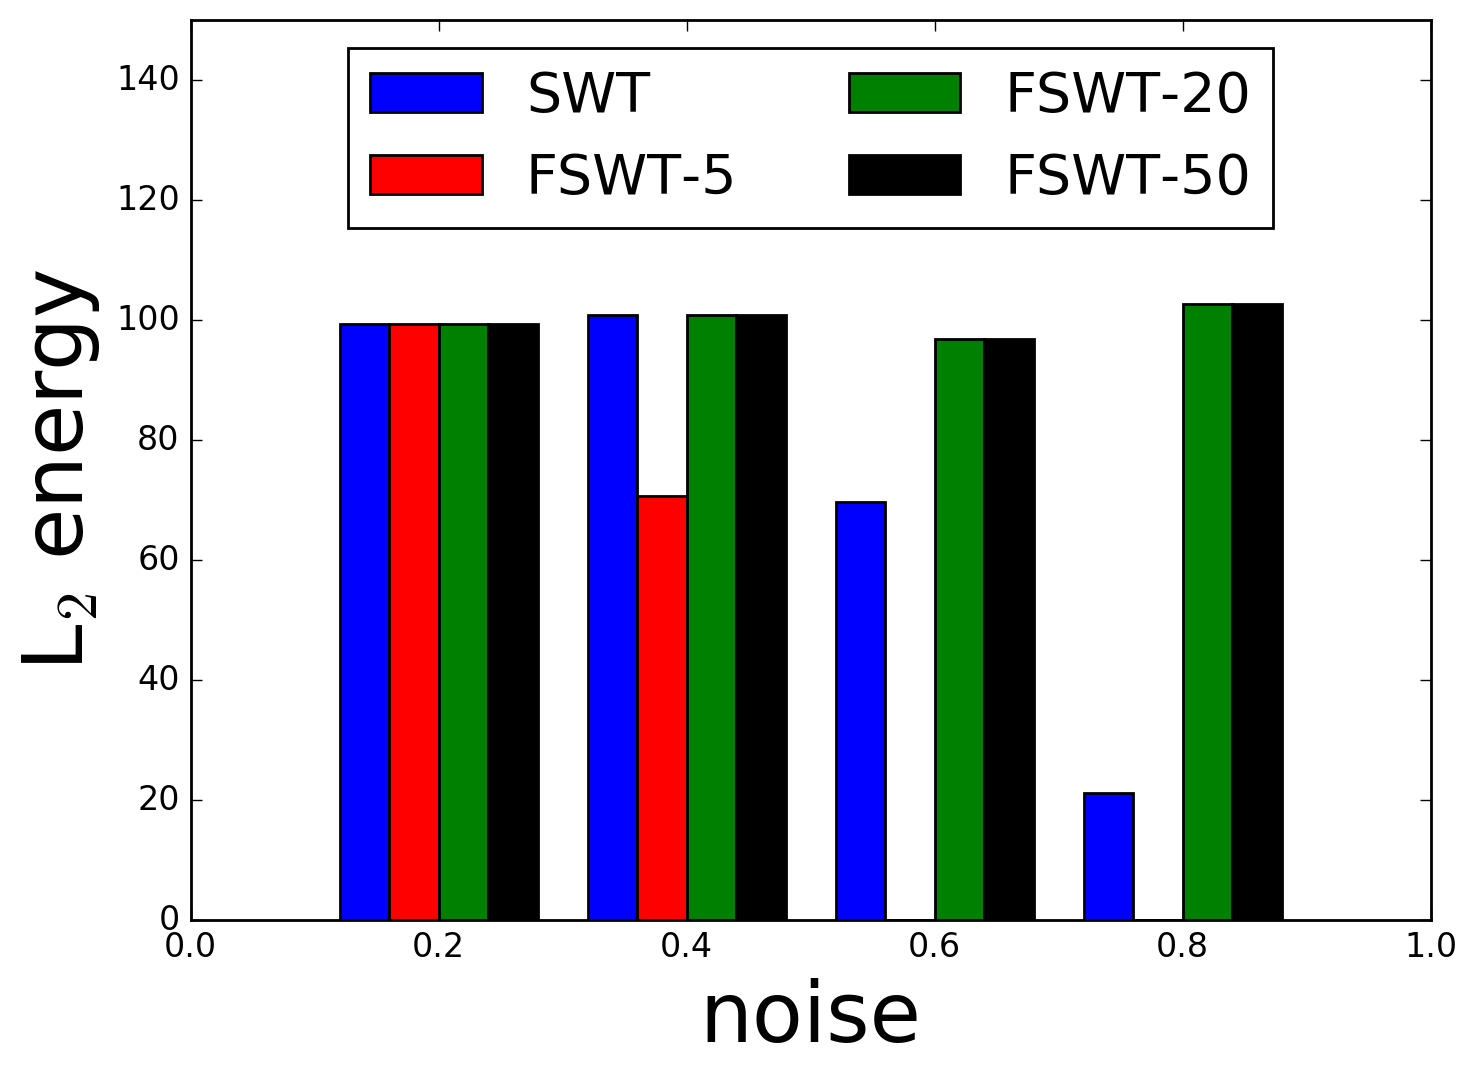

In [3]:
plot_noise_acc_experiment(res_acc, noise, "figs/noise_acc_synthetic.png")
Image(filename="figs/noise_acc_synthetic.png")

In [4]:
res_acc

array([[ 101.4547418 ,  101.4547418 ,  101.4547418 ,  101.4547418 ],
       [  99.79215928,   99.79215928,   99.79215928,   99.79215928],
       [ 100.75511039,    0.        ,   84.49203439,  100.75511039],
       [  87.71730031,    0.        ,    0.        ,   74.65226238]])

# Experiments Static Graphs

## Small Traffic Gaussian Noise

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
syn_F = generate_dyn_gaussian_noise(G, 5)

In [ ]:
algs = [HWavelets(), Fourier(), GNCWavelets(), PWavelets(5)]
res_st_noise = compression_experiment_static(G, syn_F, algs)

plot_compression_experiments(res_st_noise, "figs/st_noise_l1.png")
Image(filename="figs/st_noise_l1.png")

In [ ]:
algs = [HWavelets(), Fourier(), GNCWavelets(), PWavelets(5)]

res_stw_noise = compression_experiment_static_weighted(G, syn_F, algs)

plot_compression_experiments(res_stw_noise, "figs/stw_noise_l1.png")
Image(filename="figs/stw_noise_l1.png")

## Traffic Heat

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
syn_F = generate_dyn_heat(G, 10, 1, 10)

In [ ]:
algs = [HWavelets(), Fourier(), GNCWavelets(), PWavelets(5)]
res_st_heat = compression_experiment_static_weighted(G, syn_F, algs)

plot_compression_experiments(res_st_heat, "figs/st_heat_l1.png")
Image(filename="figs/st_heat_l1.png")

In [ ]:
plt.clf()
heatmap = plt.pcolor(syn_F)
plt.colorbar(heatmap)
plt.savefig("karate_sync_bursty.png")
Image(filename='karate_sync_bursty.png')

## Karate Gaussian Noise

In [ ]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_gaussian_noise(G, 5)

In [ ]:
algs = [HWavelets(), Fourier(), GNCWavelets(), PWavelets(2)]
res_k_noise = compression_experiment_static(G, syn_F, algs)

plot_compression_experiments(res_k_noise, "figs/k_noise_l1.png")
Image(filename="figs/k_noise_l1.png")

## Karate Heat

In [ ]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_heat(G, 4, 0.5, 1)

In [ ]:
x = numpy.log(syn_F*10000)
x[numpy.isneginf(x)] = 0

draw_graph_dynamic_values(G, x, "karate_heat.svg")

#!sfdp -Goverlap=prism -Tsvg "karate_heat.dot" > "karate_heat.svg"

from IPython.display import SVG

SVG(filename='karate_heat.svg')

In [ ]:
#algs = [HWavelets(), Fourier(), GNCWavelets(), PWavelets(3)]
#res_kw_heat = compression_experiment_static_weighted(G, syn_F, algs)

#plot_compression_experiments(res_kw_heat, "figs/kw_heat_l1.png")
#Image(filename="figs/kw_heat_l1.png")
alg = PWavelets(5)
set_weight_graph(G, syn_F[0])
alg.set_graph(G)


In [ ]:
appx_tr = numpy.copy(tr)
#appx_tr[0] = 0
appx_F = alg.inverse(tr)
L1(syn_F[0], appx_F)

In [ ]:
tr

## Small Traffic

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G)  

In [ ]:
FT_h = []

for i in range(72, 132, 12):
    FT_h.append(FT[i])
    
FT_h = numpy.array(FT_h)

In [ ]:
#x = numpy.log(syn_F*1000000000000000000)
#x[numpy.isneginf(x)] = 0


draw_graph_dynamic_values(G, -FT_h, "sth.svg")

from IPython.display import SVG

SVG(filename='sth.svg')

In [ ]:
algs = [Fourier(), PWavelets(4), GNCWavelets(), HWavelets()]
#algs = [PWavelets(2)
res_stw = compression_experiment_static(G, FT_h, algs)

plot_compression_experiments(res_stw, "figs/stw_l1.png")
Image(filename="figs/stw_l1.png")

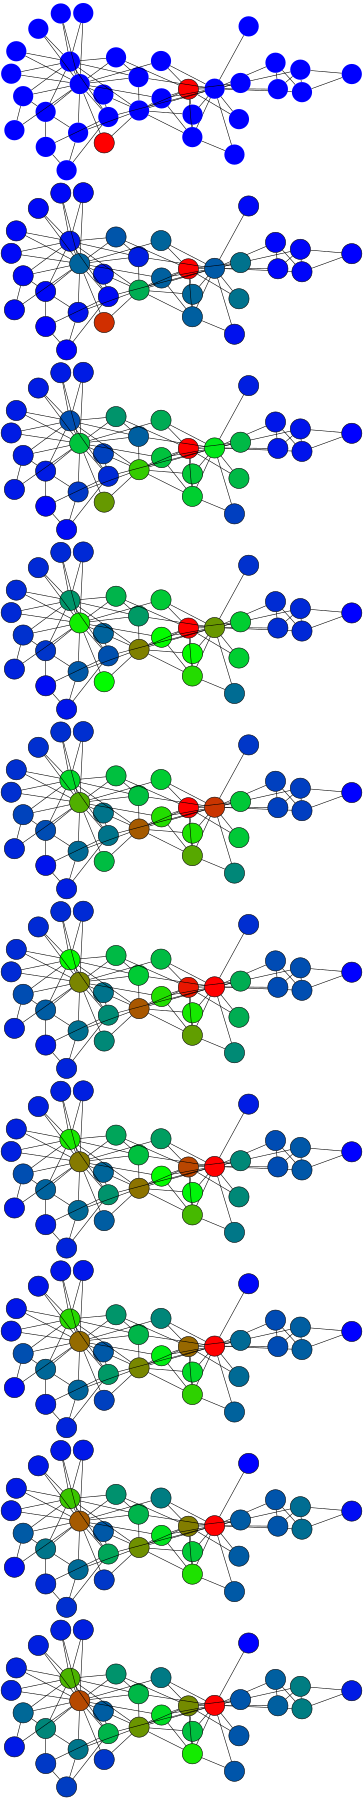

In [2]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_heat(G, 2, 1, 10)

draw_graph_dynamic_values(G, syn_F, "karate_heat.svg")

from IPython.display import SVG

SVG(filename='karate_heat.svg')

In [11]:
(tree, ind, s) =  optimal_wavelet_basis(G, syn_F[3], 10, 0)
print(s)
#(tree, ind) = normalized_cut_hierarchy(G)

size =  10
10


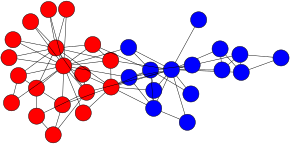

In [12]:
def partitions_avg(parts, G, F):
    i = 0
    avg_F = []
    ind = {}
    for v in G.nodes():
        ind[v] = i
        i = i + 1
        avg_F.append(0)
    
    
    for p in range(len(parts)):
        avg = 0
        for i in range(len(parts[p])):
            avg = avg + F[ind[parts[p][i]]]
        avg = float(avg) / len(parts[p])
        
        for i in range(len(parts[p])):
             avg_F[ind[parts[p][i]]] = avg
            
    return avg_F

parts = partitions_level(tree, 1, G)
avgs = partitions_avg(parts, G, syn_F[5])
set_f(G, avgs)
draw_graph_with_values(G, "karate_part.dot")

!sfdp -Goverlap=prism -Tsvg karate_part.dot > karate_part.svg

from IPython.display import SVG

SVG(filename='karate_part.svg')

In [ ]:
set_f(G, syn_F[5])
draw_graph_with_values(G, "karate_heat.dot")

!sfdp -Goverlap=prism -Tsvg karate_heat.dot > karate_heat.svg

from IPython.display import SVG

SVG(filename='karate_heat.svg')

In [ ]:
alg = OptWavelets(45, 0.)
alg.set_graph(G)
tr = alg.transform(syn_F[4])
parts = partitions_level(alg.tree, 1, G)
avgs = partitions_avg(parts, G, syn_F[4])
set_f(G, avgs)
draw_graph_with_values(G, "karate_part.dot")

!sfdp -Goverlap=prism -Tsvg karate_part.dot > karate_part.svg

from IPython.display import SVG

SVG(filename='karate_part.svg')

In [ ]:
set_f(G, syn_F[4])
draw_graph_with_values(G, "karate_heat.dot")

!sfdp -Goverlap=prism -Tsvg karate_heat.dot > karate_heat.svg

from IPython.display import SVG

SVG(filename='karate_heat.svg')

In [ ]:
print(syn_F[5])

In [5]:
algs = [OptWavelets(10), GNCWavelets()]
res_k, time = compression_experiment_static(G, syn_F[4:5], algs, [0.05, 0.1, 0.2, 0.4])

alg =  <lib.static.OptWavelets object at 0x7fcf53c1aa90>  i =  0  r =  0
[[ -6.61502865e+01  -6.54913381e+01  -4.56084408e+01 ...,  -5.49885499e+01
   -2.54055047e+01  -1.19694243e+01]
 [ -1.75150822e+01  -1.69487084e+01   1.40884817e-01 ...,  -7.92143345e+00
    1.75055536e+01   2.90540301e+01]
 [ -8.31457257e+00  -1.05415035e+01  -7.77360862e+01 ...,  -4.60358492e+01
   -1.46012259e+02  -1.91419744e+02]
 ..., 
 [ -6.00018234e+01  -6.09109635e+01  -8.83429921e+01 ...,  -7.54014465e+01
   -1.16216581e+02  -1.34754086e+02]
 [ -7.56447053e+00  -1.26296690e+01  -1.65465095e+02 ...,  -9.33622737e+01
   -3.20760612e+02  -4.24040852e+02]
 [  3.76297655e+01   3.06769576e+01  -1.79114430e+02 ...,  -8.01416211e+01
   -3.92282697e+02  -5.34051546e+02]]
[[ 0.17157105  0.17156085  0.17125264  0.17162646  0.17184283  0.17184632
   0.17184632  0.17166162  0.17140871  0.17133603  0.17184283  0.17183858
   0.17179224  0.1715377   0.17146435  0.17146435  0.171882    0.17179115
   0.17146435  0.17161686

In [6]:
res_k

{'GWT': array([ 39.81164792,  27.24419116,  18.90891145,   7.86804104]),
 'SWT': array([ 39.81164792,  28.70111378,  17.80301547,   3.48356508])}

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

FT_h = []

for i in range(0, 100, 10):
    FT_h.append(FT[i])
    
FT_h = numpy.array(FT_h)

algs = [Fourier(), GNCWavelets(), OptWavelets(10, 100.)]
res_k = compression_experiment_static(G, FT_h, algs)

plot_compression_experiments(res_k, "figs/traffic_l2.png")
Image(filename="figs/traffic_l2.png")

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

FT_h = []

for i in range(0, 100, 10):
    FT_h.append(FT[i])
    
FT_h = numpy.array(FT_h)

#algs = [Fourier(), GNCWavelets(), OptWavelets(10, 1.), OptWavelets(20, 1.), OptWavelets(20, 10.)]
algs = [OptWavelets(10, 1.), OptWavelets(20, 1.), OptWavelets(40, 1.), OptWavelets(80, 1.), OptWavelets(160, 1.)]
res_k = compression_experiment_static(G, FT_h, algs)

plot_compression_experiments(res_k, "figs/traffic_l2.png")
Image(filename="figs/traffic_l2.png")

In [ ]:
#algs = [Fourier(), GNCWavelets(), OptWavelets(10, 1.), OptWavelets(20, 1.), OptWavelets(20, 10.)]
algs = [OptWavelets(40, 0.), OptWavelets(40, 1.), OptWavelets(40, 10.), OptWavelets(40, 100.), OptWavelets(40, 1000.), OptWavelets(40, 10000.)]
res_k = compression_experiment_static(G, FT_h, algs)

plot_compression_experiments(res_k, "figs/traffic_l2.png")
Image(filename="figs/traffic_l2.png")

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

FT_h = []

for i in range(0, 100, 10):
    FT_h.append(FT[i])
    
FT_h = numpy.array(FT_h)

lambdas = list(range(0,100,10))
ks = list(range(0,200,20))
ratio = .5
(X,Y,Z) = experiment_lambda_k(G, FT_h, lambdas, ks, ratio)

plot_experiment_lambda_k(X, Y, Z, "figs/traffic_lamda_k_"+str(ratio)+".png")
Image(filename="figs/traffic_lamda_k_"+str(ratio)+".png")

In [ ]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 


In [ ]:
alg = OptWavelets(20, 10.)
alg.set_graph(G)
tr = alg.transform(FT[60])
parts = partitions_level(alg.tree, 1, G)
set_f(G, FT[60])
draw_partitions_with_values(G, parts,"traffic.dot")

!sfdp -Goverlap=prism -Tsvg traffic.dot > traffic_part.svg

from IPython.display import SVG

SVG(filename='traffic_part.svg')

In [15]:
G.subgraph([0,2,5,7]).nodes()

[0, 2, 5, 7]